In [12]:
# Convenience

from pprint import pprint

# Inputs

- downpayment :: amount of cash paid yourself up-front
- term :: number of years over which the loan will be paid off
- annual HOA dues :: homeowner's association payments, if applicable
- marginal income tax rate :: the income tax rate of your "top" dollar; the rate at your highest tax bracket
  (relevant for tax deduction calculations)
- forecasted_annual_appreciation :: the increase in the nominal dollar value of the house each year in dollars for that year, NOT the increase in the actual value of the house in current-day dollars
- annual investment return :: increase in money invested instead of spent on buying a house

In [13]:
purchase_price = 750000  # i.e. initial market value of the home
downpayment = 150000
annual_interest_rate = 0.06
term_years = 30
annual_maintenance = 1000
annual_hoa_dues = 2000
annual_insurance_payments = 1500
forecasted_annual_appreciation = 0.03
marinal_income_tax_rate = 0.30
forecasted_annual_inflation = 0.02
monthly_rent_for_similar_home = 2500
forecasted_annual_rent_inflation = 0.03
annual_investment_return = 0.06  # after taxes

# Calculated Constant Values

- principal :: total amount loaned to you; the remaining cash needed to buy the home after the downpayment

In [14]:
principal = purchase_price - downpayment

monthly_mortgage_payment = principal * (1-1/(1 + annual_interest_rate / 12))/((1-1/(1 + annual_interest_rate / 12) ** (term_years * 12 + 1)))

print('Principal:', principal)
print('Monthly Mortgage Payment:', monthly_mortgage_payment)

Principal: 600000
Monthly Mortgage Payment: 3575.864039290133


# Mortgage Scenario

In [15]:
# Values Calculated Non-Iteratively

def home_value(month: int) -> float:
    """dollar value of the house in the given month
    calculated assuming inflation is simple exponential growth
    month is zero-indexed
    dollar value is in dollars for the given year, NOT current-year dollars
    """
    assert month >= 0, f'negative month: {month}'
    return purchase_price * ((1 + forecasted_annual_appreciation) ** (month / 12))

def dollar_value(month: int) -> float:
    """value of the dollar in the given month in current-day dollars
    """
    assert month >= 0, f'negative month: {month}'
    return (1 + forecasted_annual_inflation) ** (month / 12)

In [16]:
# Timeline Iteration

timeline = [{
    'month': 0,
    'debt': principal,
    'equity in home': downpayment,
    'interest': 0,
    'payment': 0,
    'paid principal': 0,
}]

# FIXME: debt should be zero at the end of the term, but it is not
def progress1month(prev: dict) -> dict:
    """derive the world state for a new month given the previous month
    """
    assert month >= 0, f'negative month: {month}'
    state = {}
    state['month'] = prev['month'] + 1
    # TODO: this calculation is slightly wrong; fix it
    state['interest on debt'] = prev['debt'] * (annual_interest_rate / 12)
    state['paid principal'] = monthly_mortgage_payment - state['interest on debt']
    state['debt'] = prev['debt'] - state['paid principal']
    return state

for month in range(1, term_years * 12):
    #for month in range(1, 2):
    timeline.append(progress1month(timeline[-1]))

pprint(timeline[1])
pprint(timeline[-1])

{'debt': 599424.1359607099,
 'interest on debt': 3000.0,
 'month': 1,
 'paid principal': 575.864039290133}
{'debt': 24986.839964984978,
 'interest on debt': 142.1030049963936,
 'month': 359,
 'paid principal': 3433.761034293739}


(0.0, 1.8692665952451677)

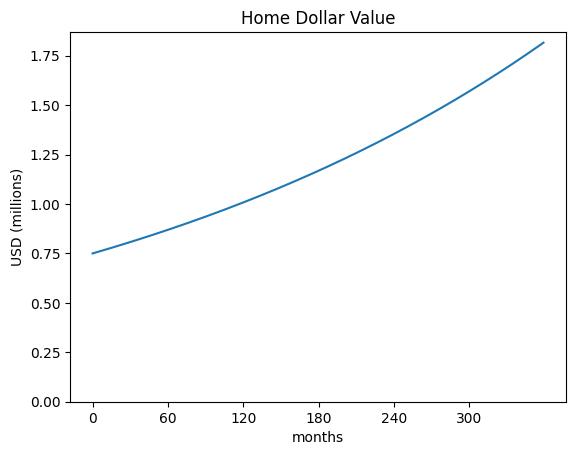

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

ys = [home_value(month) / 1000000 for month in range(term_years * 12)]
fig, ax = plt.subplots()
ax.set_title('Home Dollar Value')
ax.ticklabel_format(style='plain')
ax.set_xticks(range(0, len(ys), 12 * 5))
ax.set_xlabel("months")
ax.set_ylabel("USD (millions)")
ln, = ax.plot(ys)
ax.set_ylim(ymin=0) # must be after the plot statement

# Exponential Growth

$$
  x(t) = a*b^{\frac{t}{\tau}}
$$

where

- `a` is the starting value
- `b` is the increase per time period (e.g. doubling = 2)
- `τ` is the time period over which the compounding happens

# Uncategorized

Typically, interest is compounded yearly, but paid in monthly installments of 1/12th the yearly interest total.

It may be worth it to have house value appreciation and inflation be more sophisticated than just a guessed constant annual percentage increase.

